## 📜 Análise de sinais sonoros em Pyhon
por Iury Coelho

Este notebook tem o proposito de analisar, através da programação em python e amostras sonoras,  harmônicos e  resultados computacionais relacionados com o roteiro de estudo.

#### Conteúdo

* [1ª Amostra](#1_Amostra)
* [2ª Amostra](#2_Amostra)
* [3ª Amostra](#3_Amostra)


In [70]:
import numpy as np
from IPython.display import Audio, display, HTML
from ipywidgets import interact

import matplotlib.pyplot as plt
from scipy.io import wavfile
import requests
from io import BytesIO

In [71]:
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

In [72]:
def reconstruct(P, anbn):
    """Sum up sines and cosines according to the coefficients to 
    produce a reconstruction of the original waveform"""
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

> Considerações: 
Ao tentar rodar aplicativos do site sujerido , percebeu-se que os link dos audios estavam indexados no formato mp3. Como segue o link https://sampleswap.org/samples-ghost/SOUND%20EFFECTS%20and%20NOISES/VIDEO%20GAMES/invaders/1[kb]0.wav.mp3, Para resolver esse problema, foram indexados a função abaixo um dos sites sujeridos no artigo texto,pois estes, estão indexados em formato wav. Assim, tomou-se três amostras diferentes de audios do site: http://ecee.colorado.edu

In [73]:
def loadSound(url):
    R = requests.get(url)
    rate, data = wavfile.read(BytesIO(R.content))
    data = data * 1.0 / (abs(data).max())
    if len(data.shape) > 1:  # for stereo data, use only first channel
        data = data[:,0]
    return data, rate

# the URLs of the wav files
urls = ["http://ecee.colorado.edu/~mathys/ecen1200/hwcl09/sound4.wav"]

sounds = []
for url in urls:
    sound, rate = loadSound(url)
    sounds.append((sound, rate))

In [74]:
# Utility function two display two audios side by side in the notebook
def audioSideBySide(name1, audio1, name2, audio2):
    text = '<table class="audiotable"><tr><td>%s</td><td>%s</td></tr><tr><td>%s</td><td>%s</td></tr></table>' % (name1, name2, audio1._repr_html_(), audio2._repr_html_())
    display(HTML(text))

### 1_Amostra

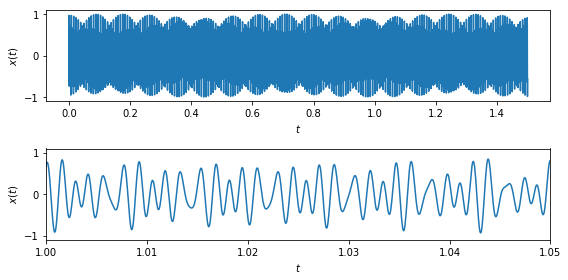

In [75]:
t = np.arange(len(sounds[0][0])) / sounds[0][1]
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(t, sounds[0][0])
plt.xlabel('$t$'); plt.ylabel('$x(t)$')
plt.subplot(212)
plt.plot(t, sounds[0][0])
plt.xlim((1, 1.05))
plt.xlabel('$t$'); plt.ylabel('$x(t)$')
plt.tight_layout()

### 2_Amostra

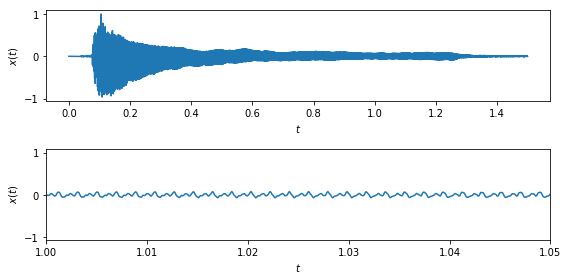

In [76]:
urls = ["http://ecee.colorado.edu/~mathys/ecen1200/hwcl09/sound1.wav"]

sounds = []
for url in urls:
    sound, rate = loadSound(url)
    sounds.append((sound, rate))

t = np.arange(len(sounds[0][0])) / sounds[0][1]
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(t, sounds[0][0])
plt.xlabel('$t$'); plt.ylabel('$x(t)$')
plt.subplot(212)
plt.plot(t, sounds[0][0])
plt.xlim((1, 1.05))
plt.xlabel('$t$'); plt.ylabel('$x(t)$')
plt.tight_layout()


### 3_Amostra

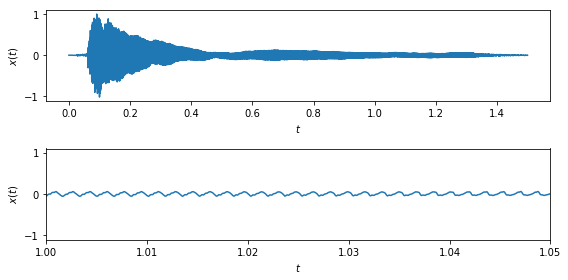

In [77]:
urls = ["http://ecee.colorado.edu/~mathys/ecen1200/hwcl09/sound3.wav"]

sounds = []
for url in urls:
    sound, rate = loadSound(url)
    sounds.append((sound, rate))

t = np.arange(len(sounds[0][0])) / sounds[0][1]
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(t, sounds[0][0])
plt.xlabel('$t$'); plt.ylabel('$x(t)$')
plt.subplot(212)
plt.plot(t, sounds[0][0])
plt.xlim((1, 1.05))
plt.xlabel('$t$'); plt.ylabel('$x(t)$')
plt.tight_layout()